# Keras OCR 모델 불러오기

In [104]:
import os
import glob

import keras_ocr

import pytesseract
from pytesseract import Output

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5
images/example2.jpg (194, 259, 3)
images/example1.jpg (1458, 2917, 3)
images/example5.jpg (194, 259, 3)
images/example4.jpg (168, 300, 3)
images/example3.jpg (194, 259, 3)


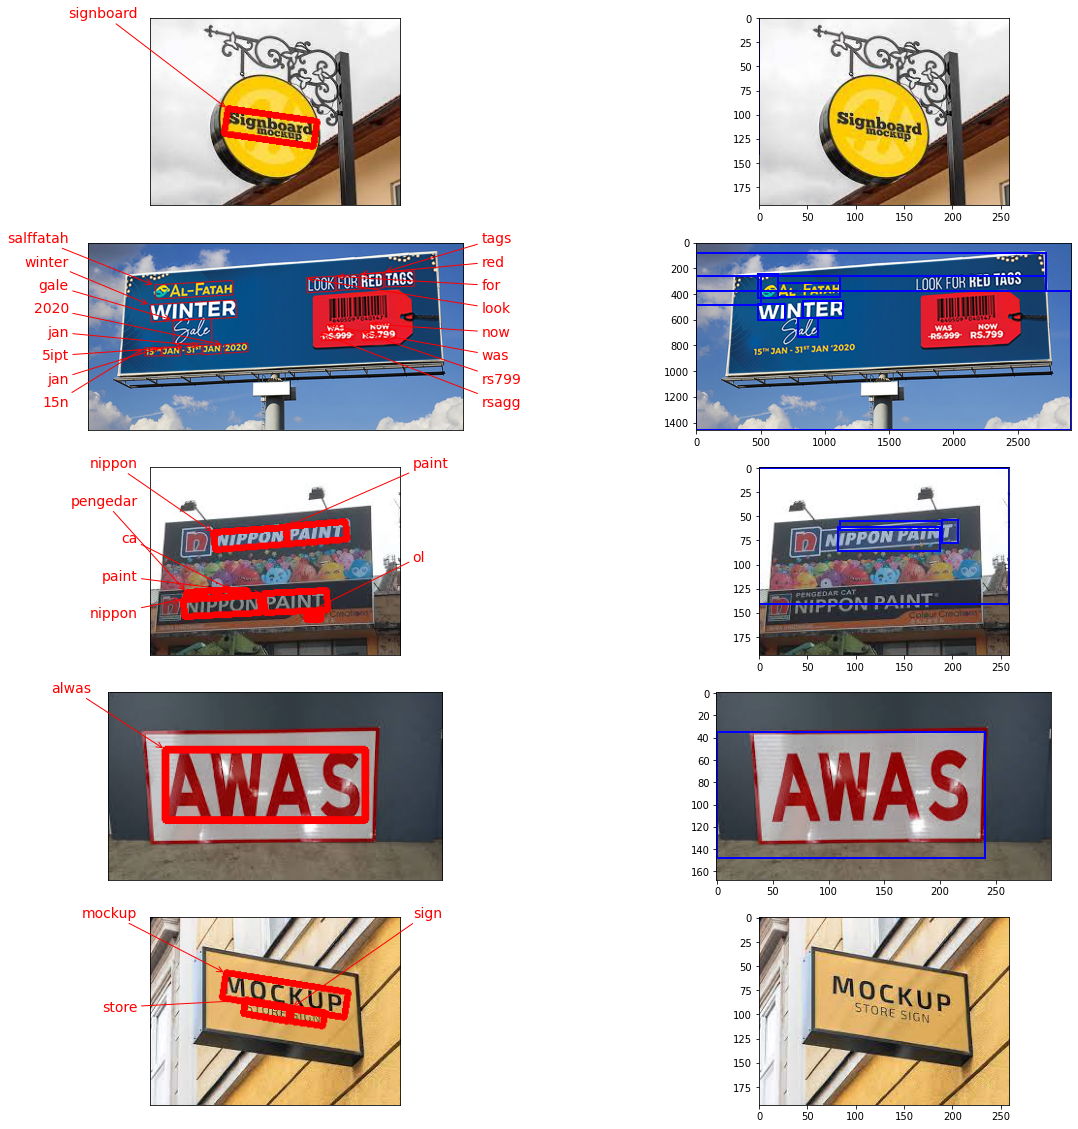

In [105]:
pipeline = keras_ocr.pipeline.Pipeline()
images_list = glob.glob('images/*.jpg')
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
for idx, image_path in enumerate(images_list):
   
    # Keras-OCR
    img = keras_ocr.tools.read(image_path)
    keras_result = pipeline.recognize([img])
    keras_ocr.tools.drawAnnotations(image=img, 
                                    predictions=keras_result[0], ax=axes[idx,0])
    
    # Tesseract
    img = Image.open(image_path)
    img_gray = img.convert('L')
    img = np.array(img) 
    result = pytesseract.image_to_data(img_gray, lang='eng', config=r'--oem 1 --psm 3', output_type=Output.DICT)
    
    axes[idx, 1].imshow(img)
    for i in range(0, len(result['text'])):
        left = result['left'][i]
        top = result['top'][i]
        width = result['width'][i]
        height = result['height'][i]
        text = result['text'][i]
        conf = int(result['conf'][i])
        
        if conf > 0:
            text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
            rect = patches.Rectangle((left, top), width, height, linewidth=2, edgecolor='b', facecolor='none')
            axes[idx, 1].add_patch(rect)

# 결과 및 해석
- 우선 Google Cloud Platform의 겨우 이미 300달러를 사용했었기 때문에 이용을 하지 못했다.
- Keras와 Tesseract를 비교했을 때 Keras는 약간 부족해도 위치는 잘 찾았지만,<br>
Tesseract의 경우 위치 조차도 잘 찾지 못했다.
- 따라서 좀 더 성능이 정확한 모델은 Keras-OCR인 것 같다.